# Setup

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

/home/kamm/miniconda3/envs/host-deconvolution/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


# Load host data


Read the raw counts file

In [2]:
bulk_data = pd.read_csv('../data/swab_gene_counts.csv', index_col=0)
display(bulk_data.shape)
bulk_data.head()

(15900, 238)

,RR057e_00202,RR057e_00080,RR057e_00287,RR057e_00753,RR057e_00751,RR057e_00520,RR057e_00505,RR057i_00083,RR057e_00764,RR057e_00451,...,RR057i_00136,RR057i_00137,RR057i_00156,RR057i_00158,RR057e_00719,RR057e_00721,RR057e_00731,RR057e_00728,RR057i_00067,RR057i_00116
ENSG00000000003,1500,608,1867,2741,406,15,258,816,57,174,...,258,52,561,612,131,1,55,97,291,82
ENSG00000000419,143,115,208,323,105,19,42,109,25,44,...,78,91,103,124,54,14,18,1,31,18
ENSG00000000457,323,203,502,687,185,87,179,190,63,104,...,114,186,140,140,73,39,28,34,132,67
ENSG00000000460,74,107,288,363,48,31,37,56,44,35,...,21,115,43,67,27,9,1,0,24,60
ENSG00000000938,18,459,1797,277,37,528,482,9,1488,1375,...,135,85,48,130,60,4,3,1,13,0


And convert the gene identifiers to gene symbol

In [3]:
import mygene
mg = mygene.MyGeneInfo()

In [4]:
mygene_converter = mg.querymany(list(bulk_data.index),scopes='all', species='human', as_dataframe=True)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-15900...done.
Finished.


/home/kamm/miniconda3/envs/host-deconvolution/lib/python3.8/site-packages/biothings_client/base.py:143: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


1 input query terms found no hit:
	['ENSG00000189144']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [5]:
bulk_data['symbol'] = mygene_converter['symbol']
bulk_data = bulk_data.set_index('symbol')
bulk_data.head()

,RR057e_00202,RR057e_00080,RR057e_00287,RR057e_00753,RR057e_00751,RR057e_00520,RR057e_00505,RR057i_00083,RR057e_00764,RR057e_00451,...,RR057i_00136,RR057i_00137,RR057i_00156,RR057i_00158,RR057e_00719,RR057e_00721,RR057e_00731,RR057e_00728,RR057i_00067,RR057i_00116
symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,1500,608,1867,2741,406,15,258,816,57,174,...,258,52,561,612,131,1,55,97,291,82
DPM1,143,115,208,323,105,19,42,109,25,44,...,78,91,103,124,54,14,18,1,31,18
SCYL3,323,203,502,687,185,87,179,190,63,104,...,114,186,140,140,73,39,28,34,132,67
C1orf112,74,107,288,363,48,31,37,56,44,35,...,21,115,43,67,27,9,1,0,24,60
FGR,18,459,1797,277,37,528,482,9,1488,1375,...,135,85,48,130,60,4,3,1,13,0


Finally write the csv to use in CibersortX.

In [6]:
bulk_data.to_csv('../data/swab_gene_counts_with_gene_symbol.csv')

# Single cell datasets

The next step is to prepare the single cell dataset. We are using **Travaglini et al, Human Lung Cell Atlas** (bioRxiv 2019)

Note: If you don't have the data you can easily download it from synapse

In [7]:
# import synapseclient 
# import synapseutils 
 
# syn = synapseclient.Synapse() 
# syn.login('username','userpassword') 
# krasnow_facs = synapseutils.syncFromSynapse(syn, 'syn21560510') 
# krasnow_droplet = synapseutils.syncFromSynapse(syn, 'syn21560511')

But here we're using the local copies

In [14]:
datasets_dir = '/mnt/ibm_lg/angela/sfaira/data/human/lung/'

In [15]:
datasets = ['droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad',
 'facs_normal_lung_blood_scanpy.20200205.RC4.h5ad']

We grouped the cells in the dataset according to their overall category.

In [10]:
cell_dict_facs = {
 'B':'B cell',
 'Basal':'Basal',
 'Basophil/Mast 1':'Basophil/Mast',
 'CD4+ Memory/Effector T':'T cell',
 'CD4+ Naive T':'T cell',
 'CD8+ Memory/Effector T':'T cell',
 'CD8+ Naive T':'T cell',
 'Ciliated':'Ciliated',
 'Classical Monocyte':'monocytes/macrophages',
 'Club':'Club',
 'Dendritic':'Dendritic',
 'Differentiating Basal':'Basal',
 'Goblet':'Goblet',
 'IGSF21+ Dendritic':'Dendritic',
 'Intermediate Monocyte':'monocytes/macrophages',
 'Macrophage':'monocytes/macrophages',
 'Myeloid Dendritic Type 2':'Dendritic',
 'Natural Killer':'T cell',
 'Natural Killer T':'T cell',
 'Neutrophil':'Neutrophil',
 'Nonclassical Monocyte':'monocytes/macrophages',
 'Plasmacytoid Dendritic':'Dendritic',
 'Proliferating NK/T':'T cell'
}

cell_dict_droplet = {
 'B':'B cell',
 'Basal':'Basal',
 'Basophil/Mast 1':'Basophil/Mast',
 'Basophil/Mast 2':'Basophil/Mast',
 'CD4+ Memory/Effector T':'T cell',
 'CD4+ Naive T':'T cell',
 'CD8+ Memory/Effector T':'T cell',
 'CD8+ Naive T':'T cell',
 'Ciliated':'Ciliated',
 'Classical Monocyte':'monocytes/macrophages',
 'Club':'Club',
 'Dendritic':'Dendritic',
 'Differentiating Basal':'Basal',
 'EREG+ Dendritic':'Dendritic',
 'Goblet':'Goblet',
 'IGSF21+ Dendritic':'Dendritic',
 'Intermediate Monocyte':'monocytes/macrophages',
 'Ionocyte':'Ionocyte',
 'Macrophage':'monocytes/macrophages',
 'Myeloid Dendritic Type 1':'Dendritic',
 'Myeloid Dendritic Type 2':'Dendritic',
 'Natural Killer':'T cell',
 'Natural Killer T':'T cell',
 'Neutrophil':'Neutrophil',
 'Nonclassical Monocyte':'monocytes/macrophages',
 'OLR1+ Classical Monocyte':'monocytes/macrophages',
 'Plasmacytoid Dendritic':'Dendritic',
 'Proliferating Basal':'Basal',
 'Proliferating Macrophage':'monocytes/macrophages',
 'Proliferating NK/T':'T cell',
 'Proximal Basal':'Basal',
 'Proximal Ciliated':'Ciliated',
 'TREM2+ Dendritic':'Dendritic'
}
   


In [16]:
for ds in datasets:
    print(ds)
    adata = sc.read_h5ad(datasets_dir+ds)
    
    adata.obs['free_annotation'] = [f.split('_')[0] for f in adata.obs['free_annotation']]
    
    if ds == 'droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad':
        adata = adata[adata.obs['free_annotation'].isin(cell_dict_droplet.keys())].copy()
    else:    
        adata = adata[adata.obs['free_annotation'].isin(cell_dict_facs.keys())].copy()
        
    adata.obs['free_annotation'] = adata.obs['free_annotation'].astype(str)
    adata.obs['free_annotation'] = adata.obs['free_annotation'].astype('category')
    sc.tl.rank_genes_groups(adata, 'free_annotation', method='wilcoxon')
    
    adata_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
    
    adata_rank_genes_list = []
    for i in adata_rank_genes.columns:
        adata_rank_genes_list = adata_rank_genes_list+list(adata_rank_genes[i])
    
    adata_rank_genes_list = list(set(adata_rank_genes_list))
    try:
        adata.X = adata.raw.X
    except:
        print("no raw slot available")
    adata = adata[:,adata_rank_genes_list]

    adatapd = pd.DataFrame(adata.X.transpose(),
                          columns=adata.obs['free_annotation'],
                         index = adata_rank_genes_list)

    if ds == 'droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad':
        adatapd.columns = [cell_dict_droplet[c] for c in adatapd.columns]
    else:
        adatapd.columns = [cell_dict_facs[c] for c in adatapd.columns]
        
    path = 'cell-type-signatures-for-deconvolution_'+ds.split(".")[0]+'.txt'
    adatapd.to_csv(path, sep='\t')

facs_normal_lung_blood_scanpy.20200205.RC4.h5ad


/home/kamm/miniconda3/envs/host-deconvolution/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/kamm/miniconda3/envs/host-deconvolution/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


In [ ]:
adatapd.head()

This produces to txt files ready to use with CiberSortX.

# CiberSort matrices after cell selection

## Load metadata

In [18]:
host_metadata = pd.read_csv(
    '../data/metatable_with_viral_status.csv')
host_metadata.head()

,CZB_ID,sequencing_batch,gender,age,SC2_PCR,SC2_rpm,IDSeq_sample_name,viral_status
0,RR057e_00202,SEQ005,F,62.0,NEG,0.301622,RR057e_00202_N05_S78,no_virus
1,RR057e_00080,SEQ003,M,81.0,NEG,0.091199,RR057e_00080_H20_S312,no_virus
2,RR057e_00287,SEQ005,F,76.0,NEG,0.763690,RR057e_00287_L09_S140,no_virus
3,RR057e_00753,SEQ005,F,36.0,POS,350.242314,RR057e_00753_G10_S151,SC2
4,RR057e_00751,SEQ005,F,58.0,POS,96314.765872,RR057e_00751_C10_S147,SC2


## FACS

Read the CiberSortX results using the smartseq2 dataset

In [20]:
cibersort_facs_abs = pd.read_excel('../results/deconvolution/CIBERSORTx_Krasnow_facs_small_list_Results.xlsx',index_col=0)
cibersort_facs_abs.head()

,Ciliated,Club,Goblet,Basal,T cell,monocytes/macrophages,Neutrophil,Basophil/Mast,Dendritic,B cell,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,
RR057e_00202,0.398706,0.0,0.039326,0.151046,0.000000,0.323963,0.000000,0.000000,0.000000,0.086958,0.004,0.295787,0.965749
RR057e_00080,0.237528,0.0,0.085015,0.059674,0.000000,0.406375,0.052816,0.000000,0.000000,0.158593,0.004,0.293483,0.966715
RR057e_00287,0.197309,0.0,0.016760,0.142059,0.000000,0.226576,0.317972,0.000000,0.000000,0.099322,0.004,0.325378,0.952713
RR057e_00753,0.345492,0.0,0.022080,0.118794,0.000000,0.346141,0.004894,0.000000,0.022781,0.139818,0.004,0.294645,0.965542
RR057e_00751,0.124600,0.0,0.018284,0.296919,0.010942,0.324890,0.000000,0.000585,0.090037,0.133744,0.002,0.417371,0.909246


In [21]:
cibersort_facs_abs.shape

(239, 13)

In [22]:
facs_deconv = cibersort_facs_abs
facs_deconv = facs_deconv[facs_deconv.columns[:-3]]
facs_deconv = facs_deconv.merge(host_metadata[['CZB_ID','viral_status']],left_on='Mixture',right_on='CZB_ID')
facs_deconv = facs_deconv.set_index('CZB_ID')
facs_deconv.head()

,Ciliated,Club,Goblet,Basal,T cell,monocytes/macrophages,Neutrophil,Basophil/Mast,Dendritic,B cell,viral_status
CZB_ID,,,,,,,,,,,
RR057e_00202,0.398706,0.0,0.039326,0.151046,0.000000,0.323963,0.000000,0.000000,0.000000,0.086958,no_virus
RR057e_00080,0.237528,0.0,0.085015,0.059674,0.000000,0.406375,0.052816,0.000000,0.000000,0.158593,no_virus
RR057e_00287,0.197309,0.0,0.016760,0.142059,0.000000,0.226576,0.317972,0.000000,0.000000,0.099322,no_virus
RR057e_00753,0.345492,0.0,0.022080,0.118794,0.000000,0.346141,0.004894,0.000000,0.022781,0.139818,SC2
RR057e_00751,0.124600,0.0,0.018284,0.296919,0.010942,0.324890,0.000000,0.000585,0.090037,0.133744,SC2


In [23]:
df_facs = pd.pivot_table(facs_deconv.reset_index(), 
                    values=['Ciliated', 'Club', 'Goblet', 'Basal', 'T cell','monocytes/macrophages',
                            'Neutrophil', 'Basophil/Mast', 'Dendritic','B cell'],
               index=['viral_status','CZB_ID']).reset_index()
df_facs = df_facs.sort_values(by='viral_status')
df_facs['Viral Load'] = df_facs['viral_status']
df_facs.loc[df_facs['viral_status']=='no_virus','Viral Load'] = 'Non-Viral ARI'
df_facs.loc[df_facs['viral_status']=='other_virus','Viral Load'] = 'Other Viral ARI'
df_facs.loc[df_facs['viral_status']=='SC2','Viral Load'] = 'COVID-19'
df_facs.head()


,viral_status,CZB_ID,B cell,Basal,Basophil/Mast,Ciliated,Club,Dendritic,Goblet,Neutrophil,T cell,monocytes/macrophages,Viral Load
0,SC2,RR057e_00154,0.092346,0.067078,0.000275,0.500499,0.0,0.002203,0.058180,0.043933,0.002042,0.233443,COVID-19
68,SC2,RR057i_00123,0.025510,0.359065,0.000000,0.383598,0.0,0.046699,0.036411,0.029375,0.000000,0.119341,COVID-19
67,SC2,RR057i_00122,0.077571,0.101601,0.000000,0.400875,0.0,0.074297,0.053729,0.000000,0.000000,0.291926,COVID-19
66,SC2,RR057i_00121,0.135355,0.048556,0.000000,0.532710,0.0,0.000000,0.132583,0.000000,0.000000,0.150795,COVID-19
65,SC2,RR057i_00114,0.073514,0.058188,0.000523,0.642419,0.0,0.027973,0.016003,0.000000,0.000000,0.181381,COVID-19


## Droplet

Read the CiberSortX results using the 10X dataset

In [24]:
cibersort_droplet_abs = pd.read_excel(
    '../results/deconvolution/CIBERSORTx_Krasnow_droplet_small_list_Results.xlsx',index_col=0)
cibersort_droplet_abs.head()

,Dendritic,B cell,monocytes/macrophages,T cell,Club,Basal,Basophil/Mast,Ciliated,Ionocyte,Goblet,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,
RR057e_00202,0.051529,0.000000,0.079670,0.0,0.0,0.451476,0.0,0.332954,0.030419,0.053952,0.000,0.338810,0.948152
RR057e_00080,0.040879,0.000000,0.265469,0.0,0.0,0.094973,0.0,0.498119,0.000000,0.100560,0.000,0.257756,1.055723
RR057e_00287,0.000000,0.000000,0.233426,0.0,0.0,0.381263,0.0,0.362460,0.000000,0.022851,0.000,0.480345,0.883263
RR057e_00753,0.025974,0.000000,0.115471,0.0,0.0,0.623369,0.0,0.179225,0.000000,0.055961,0.004,0.218600,1.005905
RR057e_00751,0.192455,0.033339,0.154180,0.0,0.0,0.352581,0.0,0.199551,0.040198,0.027696,0.000,0.554688,0.831729


In [26]:
droplet_deconv = cibersort_droplet_abs
droplet_deconv = droplet_deconv[droplet_deconv.columns[:-3]]
droplet_deconv = droplet_deconv.merge(host_metadata[['CZB_ID','viral_status']],left_on='Mixture',right_on='CZB_ID')
droplet_deconv = droplet_deconv.set_index('CZB_ID')
droplet_deconv.head()

,Dendritic,B cell,monocytes/macrophages,T cell,Club,Basal,Basophil/Mast,Ciliated,Ionocyte,Goblet,viral_status
CZB_ID,,,,,,,,,,,
RR057e_00202,0.051529,0.000000,0.079670,0.0,0.0,0.451476,0.0,0.332954,0.030419,0.053952,no_virus
RR057e_00080,0.040879,0.000000,0.265469,0.0,0.0,0.094973,0.0,0.498119,0.000000,0.100560,no_virus
RR057e_00287,0.000000,0.000000,0.233426,0.0,0.0,0.381263,0.0,0.362460,0.000000,0.022851,no_virus
RR057e_00753,0.025974,0.000000,0.115471,0.0,0.0,0.623369,0.0,0.179225,0.000000,0.055961,SC2
RR057e_00751,0.192455,0.033339,0.154180,0.0,0.0,0.352581,0.0,0.199551,0.040198,0.027696,SC2


In [27]:
df = pd.pivot_table(droplet_deconv.reset_index(), 
                    values=['Dendritic', 'B cell', 'monocytes/macrophages', 'T cell',
                            'Club','Basal', 'Basophil/Mast', 'Ciliated', 'Ionocyte','Goblet'],
               index=['viral_status','CZB_ID']).reset_index()
df = df.sort_values(by='viral_status')
df['Viral Load'] = df['viral_status']
df.loc[df['viral_status']=='no_virus','Viral Load'] = 'Non-Viral ARI'
df.loc[df['viral_status']=='other_virus','Viral Load'] = 'Other Viral ARI'
df.loc[df['viral_status']=='SC2','Viral Load'] = 'COVID-19'
df.head()


,viral_status,CZB_ID,B cell,Basal,Basophil/Mast,Ciliated,Club,Dendritic,Goblet,Ionocyte,T cell,monocytes/macrophages,Viral Load
0,SC2,RR057e_00154,0.000000,0.091739,0.0,0.667179,0.0,0.082424,0.133130,0.025528,0.0,0.000000,COVID-19
68,SC2,RR057i_00123,0.000000,0.461877,0.0,0.257234,0.0,0.003385,0.236188,0.005605,0.0,0.035711,COVID-19
67,SC2,RR057i_00122,0.054206,0.109189,0.0,0.494199,0.0,0.111203,0.057945,0.129659,0.0,0.043599,COVID-19
66,SC2,RR057i_00121,0.000000,0.147935,0.0,0.334931,0.0,0.058788,0.428979,0.009725,0.0,0.019642,COVID-19
65,SC2,RR057i_00114,0.059642,0.036411,0.0,0.708193,0.0,0.032418,0.094172,0.024559,0.0,0.044605,COVID-19


## FACS + droplet

Combine both deconvolutions to get the complete picture

In [28]:
df_facs_droplet = pd.DataFrame()
df_facs_droplet['B cell'] = (df['B cell'] + df_facs['B cell'])/2
df_facs_droplet['Basal'] = (df['Basal'] + df_facs['Basal'])/2
df_facs_droplet['Basophil/Mast'] = (df['Basophil/Mast'] + df_facs['Basophil/Mast'])/2
df_facs_droplet['Ciliated'] = (df['Ciliated'] + df_facs['Ciliated'])/2
df_facs_droplet['Club'] = (df['Club'] + df_facs['Club'])/2
df_facs_droplet['Dendritic'] = (df['Dendritic'] + df_facs['Dendritic'])/2
df_facs_droplet['Goblet'] = (df['Goblet'] + df_facs['Goblet'])/2
df_facs_droplet['T cell'] = (df['T cell'] + df_facs['T cell'])/2
df_facs_droplet['Monocytes/macrophages'] = (df['monocytes/macrophages'] + df_facs['monocytes/macrophages'])/2

df_facs_droplet['Neutrophil'] = df_facs['Neutrophil']
df_facs_droplet['Ionocyte'] = df['Ionocyte']

df_facs_droplet['czb_id'] = df_facs['CZB_ID']
df_facs_droplet['viral_load'] = df_facs['Viral Load']

df_facs_droplet = df_facs_droplet.sort_index(axis=1)

df_facs_droplet['sum'] = df_facs_droplet.iloc[:, :11].sum(axis=1)
df_facs_droplet.iloc[:, :11] = df_facs_droplet.iloc[:, :11].div(df_facs_droplet['sum'],axis=0)
df_facs_droplet['sum'] = df_facs_droplet.iloc[:, :11].sum(axis=1)

df_facs_droplet.head()

,B cell,Basal,Basophil/Mast,Ciliated,Club,Dendritic,Goblet,Ionocyte,Monocytes/macrophages,Neutrophil,T cell,czb_id,viral_load,sum
0,0.044623,0.076743,0.000133,0.564243,0.0,0.040893,0.092445,0.024671,0.112804,0.042458,0.000987,RR057e_00154,COVID-19,1.0
68,0.012536,0.403415,0.000000,0.314909,0.0,0.024612,0.133957,0.005509,0.076194,0.028870,0.000000,RR057i_00123,COVID-19,1.0
67,0.061877,0.098979,0.000000,0.420290,0.0,0.087103,0.052438,0.121765,0.157549,0.000000,0.000000,RR057i_00122,COVID-19,1.0
66,0.067350,0.097770,0.000000,0.431722,0.0,0.029252,0.279422,0.009678,0.084806,0.000000,0.000000,RR057i_00121,COVID-19,1.0
65,0.065770,0.046726,0.000258,0.667114,0.0,0.029829,0.054419,0.024261,0.111622,0.000000,0.000000,RR057i_00114,COVID-19,1.0


And write the results to a csv file.

In [29]:
df_facs_droplet.to_csv('../results/deconvolution/CIBERSORTx_Results_Krasnow_facs_droplet.csv')

# Visualizations and statistical test

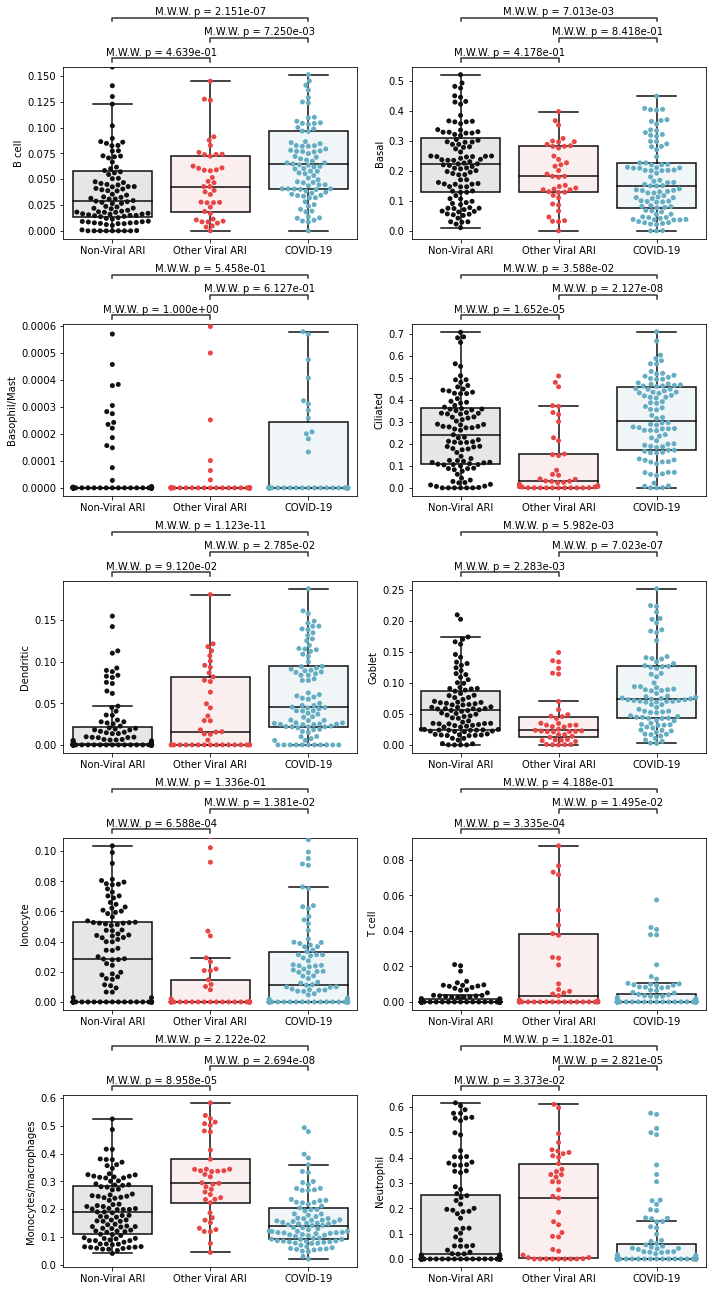

In [36]:
from statannot import add_stat_annotation

cells = ['B cell', 'Basal', 'Basophil/Mast', 'Ciliated', 
       'Dendritic', 'Goblet', 'Ionocyte', 'T cell',
       'Monocytes/macrophages', 'Neutrophil']
i = 0
j = 0

fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(10,18))
fig.subplots_adjust(hspace=.25)

covid_color_dict = {'Non-Viral ARI':'#111111','Other Viral ARI':'#E84646','COVID-19':'#65ADC2'}

for ax,c in zip(axes.flatten(),cells):
    
    sns.boxplot(data = df_facs_droplet, order = ['Non-Viral ARI','Other Viral ARI','COVID-19'],
               x = 'viral_load', y=c, palette=covid_color_dict,ax=ax,showfliers=False)
    try:
        add_stat_annotation(ax,data=df_facs_droplet, x = 'viral_load', y=c, 
                            order = ['Non-Viral ARI','Other Viral ARI','COVID-19'],
                                box_pairs=[('Non-Viral ARI','Other Viral ARI'),
                                           ('Other Viral ARI','COVID-19'),
                                           ('Non-Viral ARI','COVID-19')],
                                test='Mann-Whitney', loc='outside', verbose=0, text_format='full')# use text_format="star") for different p-value format
        
    except:
        print(c + ' didnt work')
    sns.swarmplot(data = df_facs_droplet, order = ['Non-Viral ARI','Other Viral ARI','COVID-19'],
               x = 'viral_load', y=c, palette=covid_color_dict,ax=ax)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .1))
    if j<1:
        j+=1
    else:
        i+=1
        j = 0
    
    ax.set_xlabel('')

plt.tight_layout()
plt.savefig('../figures/deconvolution/Host_deconvolution_Krasnow_facs_droplet_MWW_Bonferroni.pdf')


<ipython-input-37-82108abe7f4d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_facs_droplet.groupby(['viral_load'])['B cell','Basal','Basophil/Mast','Ciliated','Club','Dendritic',


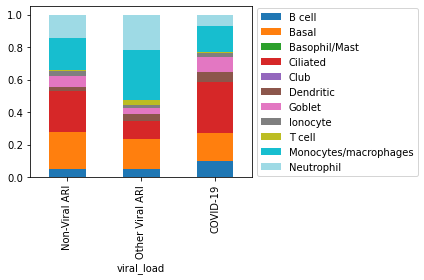

In [37]:
f = plt.figure()
df_facs_droplet.groupby(['viral_load'])['B cell','Basal','Basophil/Mast','Ciliated','Club','Dendritic',
                     'Goblet','Ionocyte','T cell','Monocytes/macrophages', 'Neutrophil'].agg(np.mean).reindex(
    ['Non-Viral ARI','Other Viral ARI','COVID-19']).plot(
    kind='bar',stacked=True, ax=f.gca(),colormap='tab20')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.savefig('../figures/deconvolution/Host_deconvolution_Krasnow_facs_droplet_cell_fractions.pdf')